In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from fuzzywuzzy import fuzz 

sns.set_palette("husl")

%matplotlib inline

In [2]:
tweets = pd.read_csv('./data/train.csv', encoding='utf-8')
tweets.loc[:,'keyword'] = tweets.loc[:,'keyword'].str.replace("%20", " ")
tweets.sample(10)

,id,keyword,location,text,target
4853,6912,mass murderer,NaN,@atljw @cnnbrk fine line btw mass murderer and...,0
1007,1460,body bagging,#WhereverI'mAt,Good diss bad beat and flow. Mark my words Mee...,0
6966,9991,tsunami,in the Word of God,@author_mike Amen today is the Day of Salvatio...,1
5950,8500,screaming,tx,@camilacabello97 Internally and externally scr...,1
2473,3544,derailment,NaN,Very sad to learn of the derailment of 2 train...,1
3319,4754,evacuate,"St. Catharines, Ontario",Evacuate from your life.,0
850,1230,blood,NaN,@Chief__CG nah young blood that cook is gone I...,0
6096,8705,sinking,NaN,Currency transgress before payday-prison ward ...,0
1749,2516,collision,Oregon,2 dead 2 injured in head-on collision on Kenai...,1
488,706,attacked,atx,I cant believe a fucking cis female is going t...,0


In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# Análisis de Keyword vs Target

## ¿Cuántas keywords únicas?

In [4]:
len(tweets.keyword.unique())

222




## Categorizar "keyword"

In [5]:
#Recibe una lista de keywords y regresa un diccionario cuyas claves son los elementos de la lista pasada y los valores
#son las keywords agrupadas que las representa
def get_keyword_dic(key_list):
    key_dic = {}
    unique_list = []
    for x in key_list:
        similarity = 0
        value = ""
        for y in unique_list:
            ratio = fuzz.ratio(x,y)
            if ratio > similarity:
                similarity = ratio
                value = y
        if similarity > 75:
            key_dic[x] = value
        else:
            key_dic[x] = x
            unique_list.append(x)
    return key_dic
categorical_keyword = get_keyword_dic(tweets.loc[:,'keyword'].dropna().tolist())

In [6]:
categorical_keyword

{'ablaze': 'ablaze',
 'accident': 'accident',
 'aftershock': 'aftershock',
 'airplane accident': 'airplane accident',
 'ambulance': 'ambulance',
 'annihilated': 'annihilated',
 'annihilation': 'annihilated',
 'apocalypse': 'apocalypse',
 'armageddon': 'armageddon',
 'army': 'army',
 'arson': 'arson',
 'arsonist': 'arson',
 'attack': 'attack',
 'attacked': 'attack',
 'avalanche': 'avalanche',
 'battle': 'battle',
 'bioterror': 'bioterror',
 'bioterrorism': 'bioterror',
 'blaze': 'ablaze',
 'blazing': 'blazing',
 'bleeding': 'bleeding',
 'blew up': 'blew up',
 'blight': 'blight',
 'blizzard': 'blizzard',
 'blood': 'blood',
 'bloody': 'blood',
 'blown up': 'blew up',
 'body bag': 'body bag',
 'body bagging': 'body bag',
 'body bags': 'body bag',
 'bomb': 'bomb',
 'bombed': 'bomb',
 'bombing': 'bombing',
 'bridge collapse': 'bridge collapse',
 'buildings burning': 'buildings burning',
 'buildings on fire': 'buildings on fire',
 'burned': 'burned',
 'burning': 'burning',
 'burning buildings

In [7]:
categorical_keyword['blazing'] = 'ablaze'
categorical_keyword['bleeding'] = 'blood'
categorical_keyword['buildings%20on%20fire'] = 'buildings burning'
categorical_keyword['burning%20buildings'] = 'buildings burning'
categorical_keyword['burning'] = 'burned'
categorical_keyword['dead'] = 'death'
categorical_keyword['demolition'] = 'demolish'
categorical_keyword['destruction'] = 'destroy'
categorical_keyword['explosion'] = 'explode'
categorical_keyword['flood'] = 'flooding'
categorical_keyword['floods'] = 'flooding'
categorical_keyword['inundated'] = 'inundation'
categorical_keyword['panic'] = 'panicking'
categorical_keyword['rainstorm'] = 'rainstorm'
categorical_keyword['riot'] = 'rioting'
categorical_keyword['screaming'] = 'screamed'
categorical_keyword['snowstorm'] = 'snowstorm'
categorical_keyword['survivors'] = 'survive'
categorical_keyword['traumatised'] = 'trauma'
categorical_keyword['violent%20storm'] = 'storm'
categorical_keyword['windstorm'] = 'storm'
categorical_keyword['traumatised'] = 'trauma'

In [8]:
tweets.loc[:,'categorical_keyword'] = tweets.keyword.dropna().transform(lambda x: categorical_keyword[x])
tweets.sample(10)

,id,keyword,location,text,target,categorical_keyword
1914,2755,curfew,Ankara - Malatya - ad Orontem,ARA news reporting JaN fighters infiltrated As...,1,curfew
4031,5724,forest fire,NaN,IT STARTS A FOREST FIRE THAT CANNOT BE PUT OUT...,1,forest fire
6069,8669,sinkhole,NaN,Sinkhole swallows Brooklyn intersection ÛÒ vi...,1,sinkhole
660,955,blaze,"Columbus, OH",UGH Y DID BLAZE PUT THE CALORIES BY THEIR PIZZ...,0,ablaze
4753,6762,lightning,"Greensboro, North Carolina",Expect gusty winds heavy downpours and lightni...,1,lightning
3078,4415,electrocute,NaN,Electric vs Gas brewing (not wanting to electr...,0,electrocute
3309,4740,evacuate,"Gold Coast, Qld, Australia",myGC: Broken powerlines evacuate Gold Coast tr...,1,evacuate
5273,7535,oil spill,NaN,Refugio oil spill may have been costlier bigge...,1,oil spill
2279,3270,demolish,"Port Harcourt, Nigeria",Enugu Government to demolish illegal structure...,1,demolish
613,884,bioterrorism,NaN,Firepower in the lab [electronic resource] : a...,0,bioterror


### ¿Cuántas categorías de keyword quedan?

In [9]:
len(tweets.categorical_keyword.unique())

150

## Visualización wordcloud de las keywords categóricas

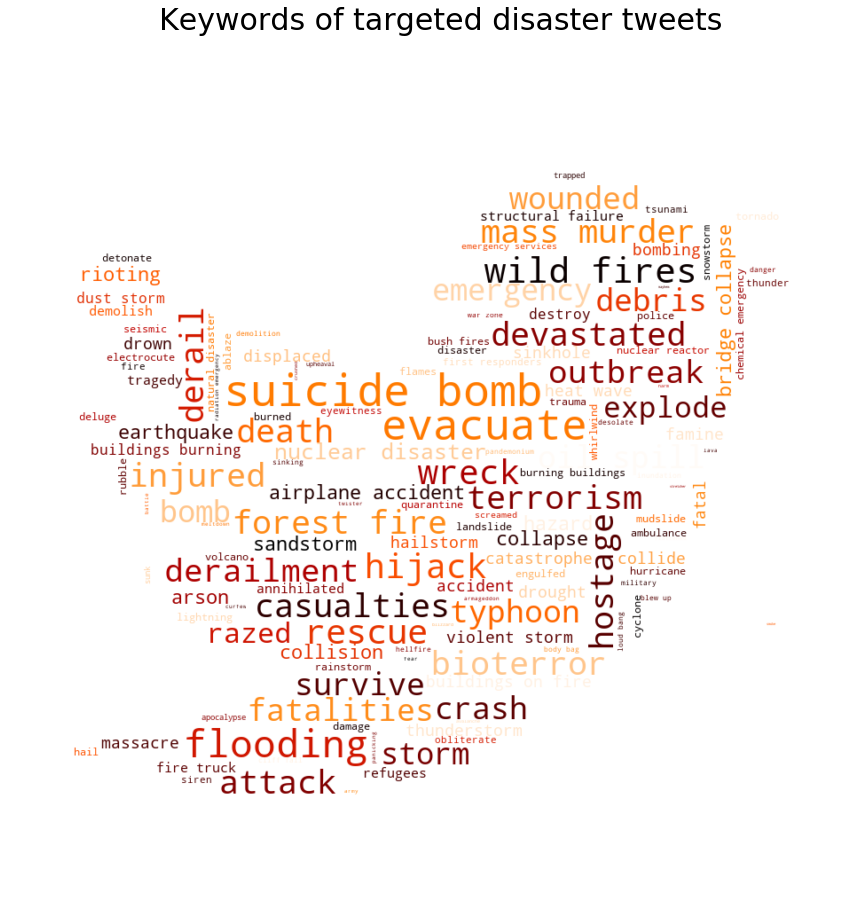

In [10]:
def transform_format(val):
    if val == 1:
        return 255
    else:
        return val

keywords_count = tweets.loc[tweets['target'] == 1].categorical_keyword.value_counts()
keywords_count.index = keywords_count.index.map(str)

mask = np.array(Image.open("./img/twitter_black.png"))
mask_transformed = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    mask_transformed[i] = list(map(transform_format, mask[i]))

wordcloud = WordCloud(max_font_size=50, max_words=200, random_state=42, 
                      background_color='white', colormap='gist_heat',
                      mask=mask_transformed)
wordcloud.generate_from_frequencies(keywords_count)

plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Keywords of targeted disaster tweets", fontsize=30, pad=40)
plt.axis("off")
plt.show()

# Entra -> Portada

## Porcentaje de verdaderos y falsos por cada keyword

In [11]:
keywords_grouped = tweets.groupby(['categorical_keyword', 'target']).agg({'categorical_keyword':['count']})
keywords_level1 = keywords_grouped.columns.get_level_values(1)

print(keywords_level1)

keywords_grouped.columns = keywords_level1
keywords_grouped.reset_index(inplace=True)
keywords_grouped.head(10)

Index(['count'], dtype='object')


,categorical_keyword,target,count
0,ablaze,0,89
1,ablaze,1,19
2,accident,0,11
3,accident,1,24
4,aftershock,0,34
5,airplane accident,0,5
6,airplane accident,1,30
7,ambulance,0,18
8,ambulance,1,20
9,annihilated,0,42


In [12]:
keywords_total_count = tweets.groupby(['categorical_keyword']).agg({'categorical_keyword': ['count']})
keywords_total_count.columns = 'total_' + keywords_total_count.columns.get_level_values(1)
keywords_total_count.reset_index(inplace=True)
keywords_total_count.head(10)

,categorical_keyword,total_count
0,ablaze,108
1,accident,35
2,aftershock,34
3,airplane accident,35
4,ambulance,38
5,annihilated,63
6,apocalypse,32
7,armageddon,42
8,army,34
9,arson,66


In [13]:
keywords = keywords_grouped.merge(keywords_total_count, left_on='categorical_keyword', right_on='categorical_keyword', how='left')
keywords.loc[:,'percentage_count'] = (keywords.loc[:, 'count'] / keywords.loc[:, 'total_count']) * 100
keywords.head(10)

,categorical_keyword,target,count,total_count,percentage_count
0,ablaze,0,89,108,82.407407
1,ablaze,1,19,108,17.592593
2,accident,0,11,35,31.428571
3,accident,1,24,35,68.571429
4,aftershock,0,34,34,100.000000
5,airplane accident,0,5,35,14.285714
6,airplane accident,1,30,35,85.714286
7,ambulance,0,18,38,47.368421
8,ambulance,1,20,38,52.631579
9,annihilated,0,42,63,66.666667


## Keywords tweets más acertados, tomando como >= 90% targeted y frecuencia mayor a 10 (Verdadero)

In [14]:
targeted_keywords = keywords.loc[(keywords['percentage_count'] >= 90) & (keywords['total_count'] >= 10) & (keywords['target'] == 1)]
targeted_keywords

,categorical_keyword,target,count,total_count,percentage_count
40,bombing,1,27,29,93.103448
81,debris,1,37,37,100.000000
90,derailment,1,39,39,100.000000
194,nuclear disaster,1,31,34,91.176471
200,oil spill,1,37,38,97.368421
202,outbreak,1,39,40,97.500000
250,suicide bomb,1,94,99,94.949495
276,typhoon,1,37,38,97.368421


Text(0,0.5,'Keyword')

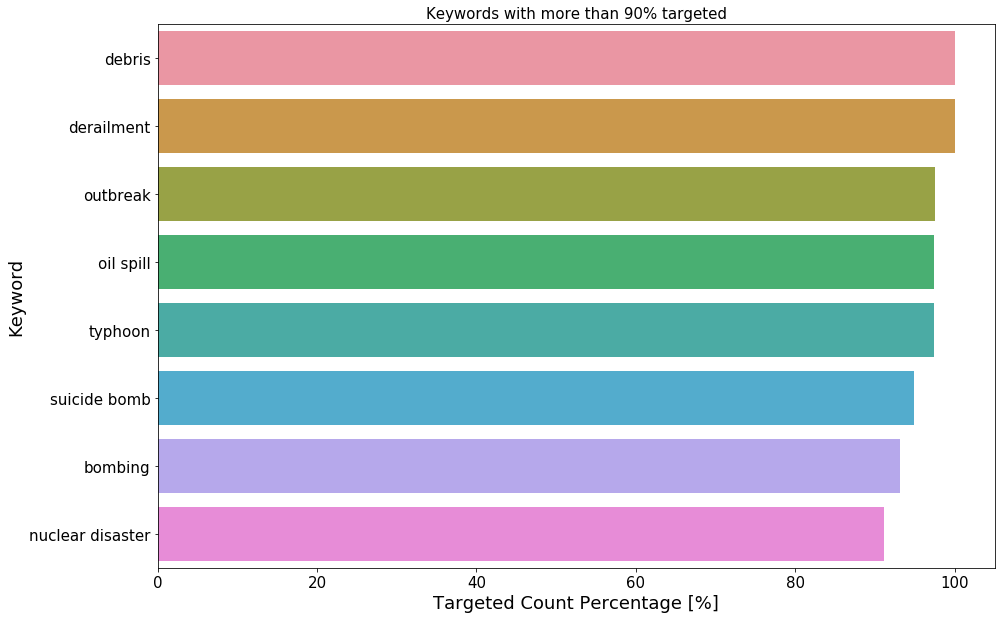

In [15]:
# Entra con el siguiente
targeted_keywords = targeted_keywords.sort_values(['percentage_count'], ascending=False)
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=targeted_keywords['percentage_count'], y=targeted_keywords['categorical_keyword'],
               orient='h')

g.set_title('Keywords with more than 90% targeted', fontsize=15)
g.set_xlabel('Targeted Count Percentage [%]', fontsize=18)
g.set_ylabel('Keyword', fontsize=18)

## Keywords de tweets menos acertados, tomando como >= 90% not targeted y frecuencia mayor a 10 (Falsos)

In [16]:
not_targeted_keywords = keywords.loc[(keywords['percentage_count'] >= 90) & (keywords['total_count'] >= 10) & (keywords['target'] == 0)]
not_targeted_keywords

# frequency >= 10

,categorical_keyword,target,count,total_count,percentage_count
4,aftershock,0,34,34,100.000000
29,blight,0,30,32,93.750000
35,body bag,0,100,107,93.457944
119,epicentre,0,11,12,91.666667
153,harm,0,37,41,90.243902
183,mayhem,0,27,30,90.000000
205,panicking,0,65,70,92.857143
225,ruin,0,36,37,97.297297
239,smoke,0,31,34,91.176471
245,stretcher,0,30,33,90.909091


Text(0,0.5,'Keyword')

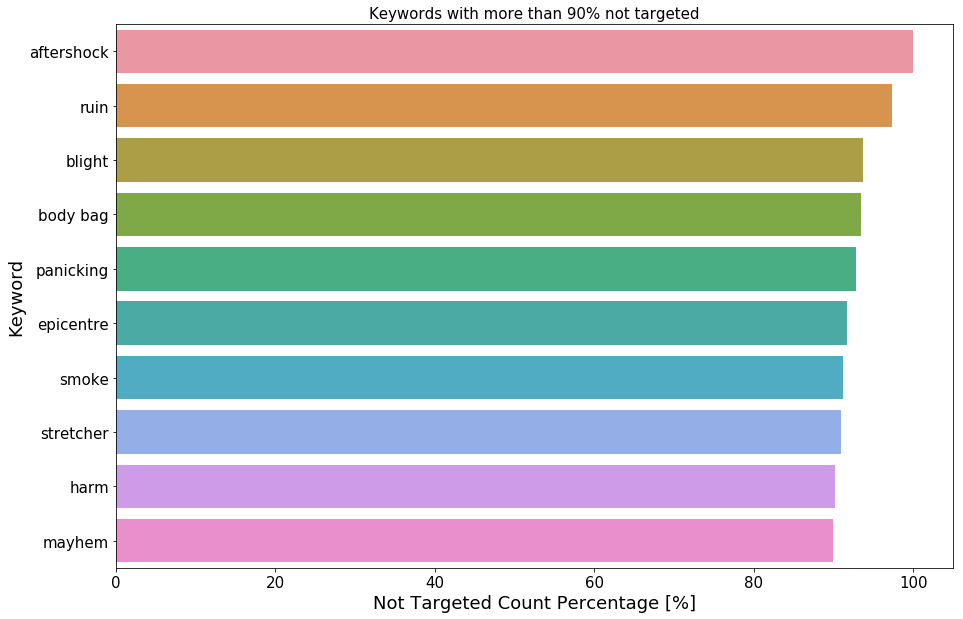

In [17]:
# Entra
not_targeted_keywords = not_targeted_keywords.sort_values(['percentage_count'], ascending=False)
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=not_targeted_keywords['percentage_count'], y=not_targeted_keywords['categorical_keyword'],
               orient='h')

g.set_title('Keywords with more than 90% not targeted', fontsize=15)
g.set_xlabel('Not Targeted Count Percentage [%]', fontsize=18)
g.set_ylabel('Keyword', fontsize=18)

## Distribución largo de la Keyword en función de si es verdadero o falso

In [18]:
keyword_tweets = tweets.dropna(subset=['keyword']).copy()
keyword_tweets['keyword_length'] = keyword_tweets['keyword'].apply(len)
keyword_tweets

,id,keyword,location,text,target,categorical_keyword,keyword_length
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,ablaze,6
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,ablaze,6
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,ablaze,6
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,ablaze,6
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,ablaze,6
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,ablaze,6
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,ablaze,6
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,ablaze,6
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0,ablaze,6
40,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,ablaze,6


In [19]:
keyword_length = keyword_tweets.groupby(['target'])\
                .agg({'keyword_length': ['count','mean','min','max']})
keyword_length.columns = keyword_length.columns.get_level_values(0) + \
                '_' + keyword_length.columns.get_level_values(1)
keyword_length.reset_index(inplace=True)
keyword_length

,target,keyword_length_count,keyword_length_mean,keyword_length_min,keyword_length_max
0,0,4323,7.993060,4,19
1,1,3229,8.991329,4,19


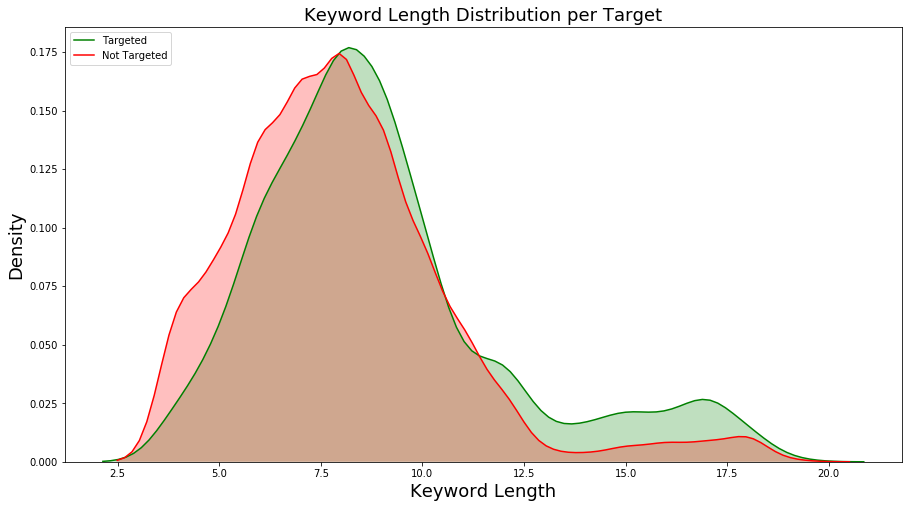

In [20]:
# Entra notebook -> informe quizas

fig, ax = plt.subplots(figsize=(15,8))
g = sns.kdeplot(keyword_tweets.loc[(keyword_tweets['target'] == 1), :]['keyword_length'], 
                color='green',
                label='Targeted',
                shade=True,
               ax= ax)
g = sns.kdeplot(keyword_tweets.loc[(keyword_tweets['target'] == 0), :]['keyword_length'], 
                color='red',
                label='Not Targeted',
                shade=True,
               ax= ax)

g.set_title('Keyword Length Distribution per Target', fontsize=18)
g.set_xlabel('Keyword Length', fontsize=18)
g.set_ylabel('Density', fontsize=18)
g.legend(loc='upper left')

# Análisis de Location vs Target

In [21]:
tweets_location = pd.read_csv('./data/tweets_with_clean_location.csv', encoding='utf-8')
tweets_location.loc[:,'keyword'] = tweets_location.loc[:,'keyword'].str.replace("%20", " ")
tweets_location.sample(10)

,Unnamed: 0,id,keyword,location,text,target,address_latitude_longitude,city,country,latitude,longitude
6503,6503,9297,survive,United States,AHH forgot my headphones how am I supposed to ...,0,"('United States', 39.7837304, -100.4458825)",NaN,NaN,39.783730,-100.445882
1377,1377,1986,bush fires,The Internet & NYC,'When you attack women's health you attack Ame...,0,"('One hundred Internet cafe, Prince Street, Li...",One hundred Internet cafe,United States of America,40.761408,-73.832730
7250,7250,10380,weapons,London,Death certificates safes weapons and Teslas: D...,0,"('London, Greater London, England, SW1A 2DX, U...",London,United Kingdom,51.507322,-0.127647
2656,2656,3815,detonate,"Brasil,SP",Apollo Brown - 'Detonate' f. M.O.P. | http://t...,0,"('São Paulo, Região Sudeste, Brasil', -21.9549...",São Paulo,Brasil,-21.954981,-49.023235
5993,5993,8558,screams,Freddy Fazbears pizzeria,@drag0nking0201 *Screams*don't scare me and it...,0,"(None, None, None)",NaN,NaN,NaN,NaN
3312,3312,4745,evacuate,London UK,US govt refuses to evacuate 1000s of Americans...,1,"('London, Greater London, England, SW1A 2DX, U...",London,United Kingdom,51.507322,-0.127647
5051,5051,7199,natural disaster,MÌ©xico D.F.,RaÌ¼l sends a message of condolence to Vietnam...,1,"(None, None, None)",NaN,NaN,NaN,NaN
7321,7321,10481,wild fires,NaN,Wild land fires.. Here I come. ??????,1,"('Nanno, Comunità della Val di Non, Provincia ...",Nanno,Italia,46.314475,11.048029
4834,4834,6881,mass murder,Anonymous,http://t.co/c1H7JECFrV @RoyalCarribean do your...,1,"('Anonymous, Prince Henry Heights, Toowoomba, ...",Anonymous,Australia,-27.542181,151.983028
4533,4533,6446,injured,Kolkata,Terrorists attack police post; 2 SPOs injured ...,1,"('Kolkata, West Bengal, India', 22.54541245, 8...",Kolkata,India,22.545412,88.356775


## Top 5 países con más de 20 tweets y la cantidad de tweets reales relativo de desastre

In [22]:
 ## PONER TODO EN PORCENTAJE Y AGREGAR AMBOS GRAFICOS JUNTOS
count_by_country = tweets_location.groupby(['country']).size().to_frame()
count_by_country.reset_index(inplace=True)
count_by_country.columns = ['country', 'ctry_count']
count_by_country.head(3)

,country,ctry_count
0,Argentina,15
1,Armenia,1
2,Australia,102


In [23]:
targeted_tweets_location = tweets_location.loc[tweets_location['target'] == 1].groupby(['country']).size().to_frame()
targeted_tweets_location.reset_index(inplace=True)
targeted_tweets_location.columns = ['country', 'targeted_ctry_count']
targeted_tweets_location.head(3)

,country,targeted_ctry_count
0,Argentina,6
1,Australia,57
2,Bangladesh,2


In [24]:
count_by_country = count_by_country.merge(targeted_tweets_location, left_on='country', right_on='country')
count_by_country.loc[:,'relative_targeted_ctry_count'] = (count_by_country.loc[:,'targeted_ctry_count'] / count_by_country.loc[:, 'ctry_count'] ) * 100
count_by_country.sample(5)

,country,ctry_count,targeted_ctry_count,relative_targeted_ctry_count
49,Somalia / الصومال,2,2,1.000000
23,Iraq,1,1,1.000000
38,Peru,8,4,0.500000
21,India,112,71,0.633929
43,România,22,7,0.318182


In [25]:
top_5_ctry_targeted = count_by_country.loc[count_by_country['ctry_count'] > 20].nlargest(5, ['relative_targeted_ctry_count'])
top_5_ctry_targeted

,country,ctry_count,targeted_ctry_count,relative_targeted_ctry_count
35,Nigeria,37,24,0.648649
13,Deutschland,25,16,0.640000
29,Kenya,22,14,0.636364
21,India,112,71,0.633929
1,Australia,102,57,0.558824


Text(0,0.5,'Country')

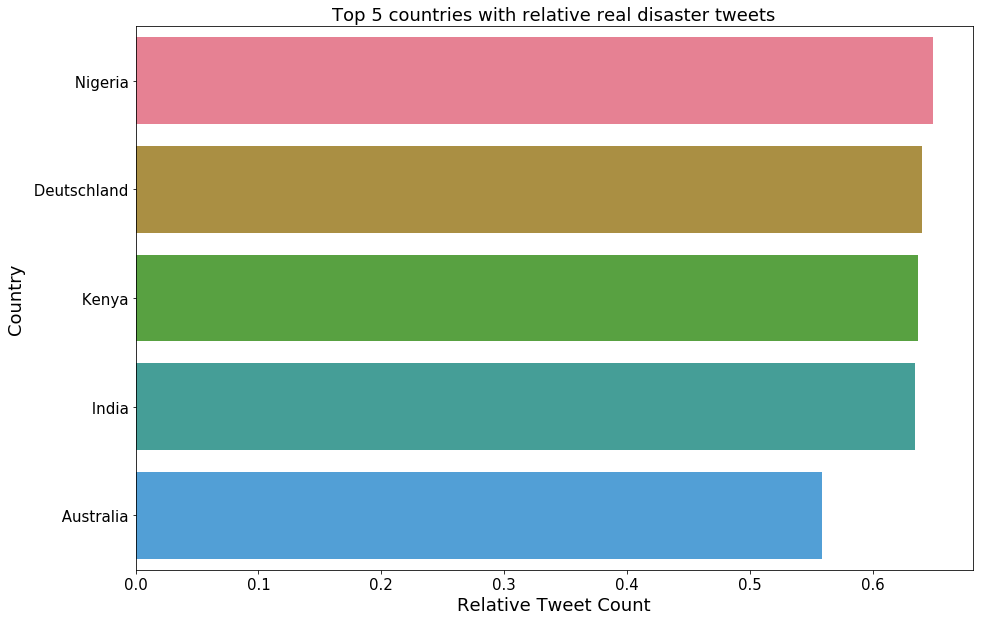

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=top_5_ctry_targeted['relative_targeted_ctry_count'], y=top_5_ctry_targeted['country'],
               orient='h')

g.set_title('Top 5 countries with relative real disaster tweets', fontsize=18)
g.set_xlabel('Relative Tweet Count', fontsize=18)
g.set_ylabel('Country', fontsize=18)

## Top 5 países con más de 20 tweets y la cantidad de tweets falsos relativo de desastre

In [27]:
not_targeted_tweets_location = tweets_location.loc[tweets_location['target'] == 0].groupby(['country']).size().to_frame()
not_targeted_tweets_location.reset_index(inplace=True)
not_targeted_tweets_location.columns = ['country','not_targeted_ctry_count']
not_targeted_tweets_location.head(3)

,country,not_targeted_ctry_count
0,Argentina,9
1,Armenia,1
2,Australia,45


In [28]:
count_by_country = count_by_country.merge(not_targeted_tweets_location, left_on='country', right_on='country')
count_by_country.loc[:,'relative_not_targeted_ctry_count'] = count_by_country.loc[:,'not_targeted_ctry_count'] / count_by_country.loc[:, 'ctry_count']
count_by_country.head(5)

,country,ctry_count,targeted_ctry_count,relative_targeted_ctry_count,not_targeted_ctry_count,relative_not_targeted_ctry_count
0,Argentina,15,6,0.400000,9,0.600000
1,Australia,102,57,0.558824,45,0.441176
2,Bangladesh,3,2,0.666667,1,0.333333
3,Barbados,2,1,0.500000,1,0.500000
4,België - Belgique - Belgien,4,2,0.500000,2,0.500000


In [29]:
top_5_ctry_not_targeted = count_by_country.loc[count_by_country['ctry_count'] > 20].nlargest(5, ['relative_not_targeted_ctry_count'])
top_5_ctry_not_targeted

,country,ctry_count,targeted_ctry_count,relative_targeted_ctry_count,not_targeted_ctry_count,relative_not_targeted_ctry_count
34,Philippines,35,10,0.285714,25,0.714286
38,România,22,7,0.318182,15,0.681818
44,South Africa,25,9,0.360000,16,0.640000
50,United Kingdom,419,154,0.367542,265,0.632458
30,New Zealand,25,10,0.400000,15,0.600000


Text(0,0.5,'Country')

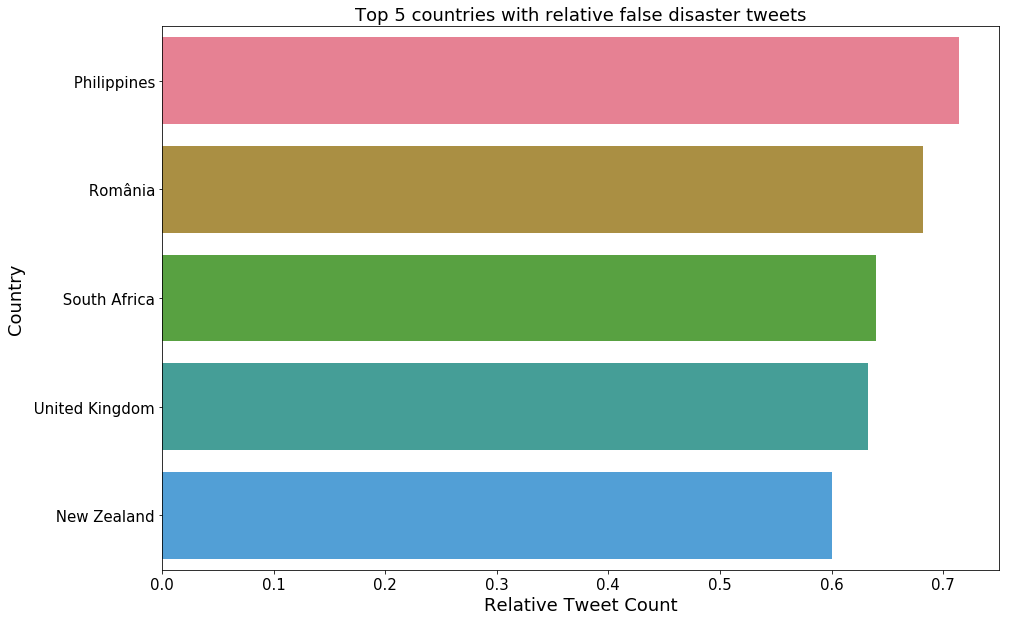

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=top_5_ctry_not_targeted['relative_not_targeted_ctry_count'], y=top_5_ctry_not_targeted['country'],
               orient='h')

g.set_title('Top 5 countries with relative false disaster tweets', fontsize=18)
g.set_xlabel('Relative Tweet Count', fontsize=18)
g.set_ylabel('Country', fontsize=18)

## Top 10 keywords más usadas por país

In [35]:
keyword_by_country = tweets_location.dropna().groupby(['country','keyword']).size().to_frame()
keyword_by_country.reset_index(inplace=True)
keyword_by_country.columns = ['country', 'keyword', 'count']
top_10_keyword_by_country = keyword_by_country.nlargest(10, ['count'])
top_10_keyword_by_country

,country,keyword,count
1020,United States of America,collision,24
915,United Kingdom,mudslide,19
986,United States of America,bioterror,19
1082,United States of America,flood,18
1184,United States of America,windstorm,18
1055,United States of America,drowning,17
971,United States of America,accident,16
988,United States of America,blaze,16
1005,United States of America,buildings on fire,16
1014,United States of America,chemical emergency,16


Text(0,0.5,'Keyword, Country')

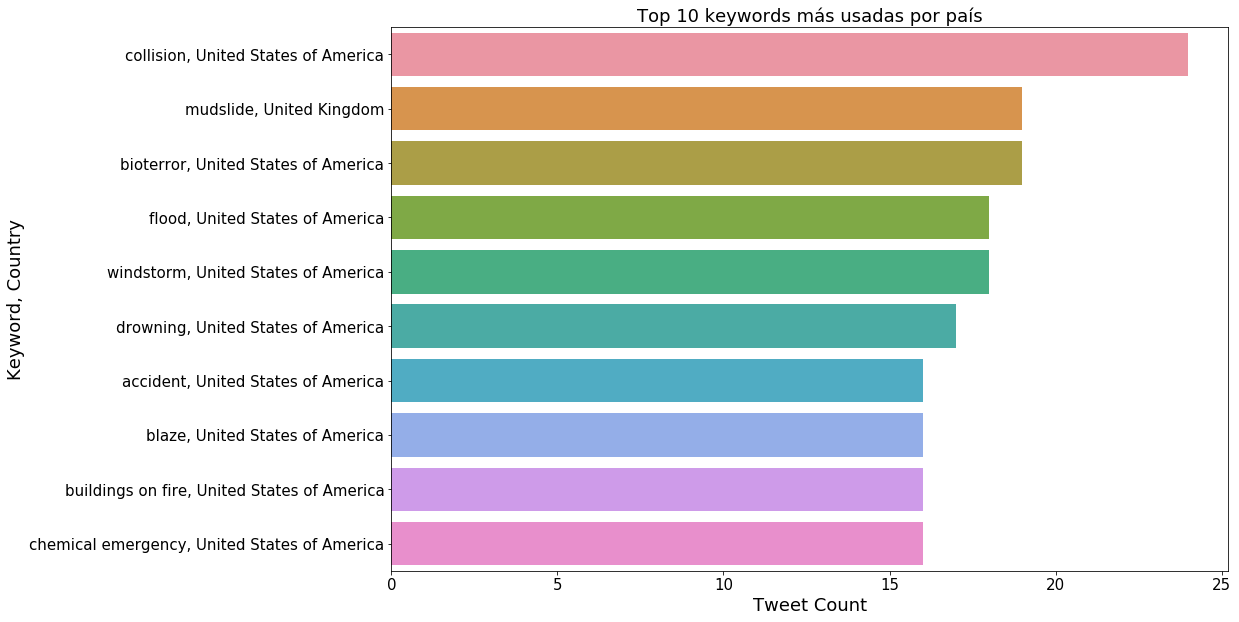

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=top_10_keyword_by_country['count'], 
                y=top_10_keyword_by_country['keyword'] + ',' + top_10_keyword_by_country['country'],
               orient='h')

g.set_title('Top 10 keywords más usadas por país', fontsize=18)
g.set_xlabel('Tweet Count', fontsize=18)
g.set_ylabel('Keyword, Country', fontsize=18)

## Top 10 keywords más usadas por país y que se trate de tweets reales

In [38]:
keyword_by_country = tweets_location.dropna().groupby(['country','keyword','target']).size().to_frame()
keyword_by_country.reset_index(inplace=True)
keyword_by_country.columns = ['country', 'keyword','target', 'count']
top_10_targeted_keyword_by_country = keyword_by_country.loc[keyword_by_country['target'] == 1].nlargest(10, ['count'])

Text(0,0.5,'Keyword, Country')

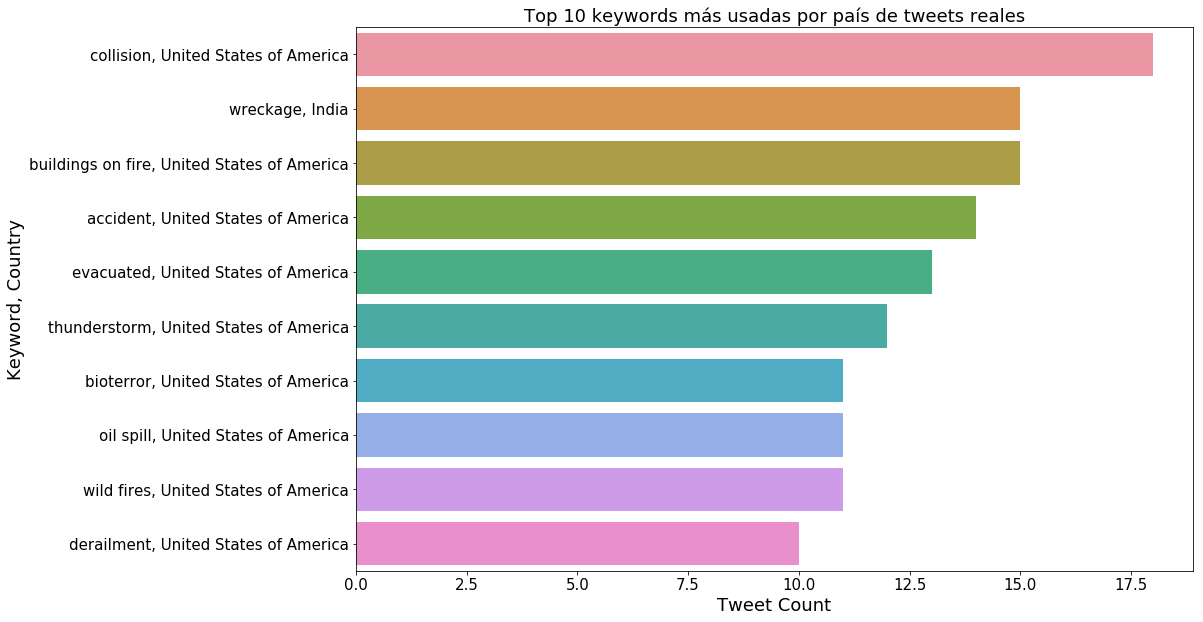

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
g = sns.barplot(x=top_10_targeted_keyword_by_country['count'], 
                y=top_10_targeted_keyword_by_country['keyword'] + ',' + top_10_targeted_keyword_by_country['country'],
               orient='h')

g.set_title('Top 10 keywords más usadas por país de tweets reales', fontsize=18)
g.set_xlabel('Tweet Count', fontsize=18)
g.set_ylabel('Keyword, Country', fontsize=18)

In [ ]:
## TOP 15 KEYWORDS VS TOP 15 COUNTRY HEATMAP